In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("Fish_dataset.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<Axes: >

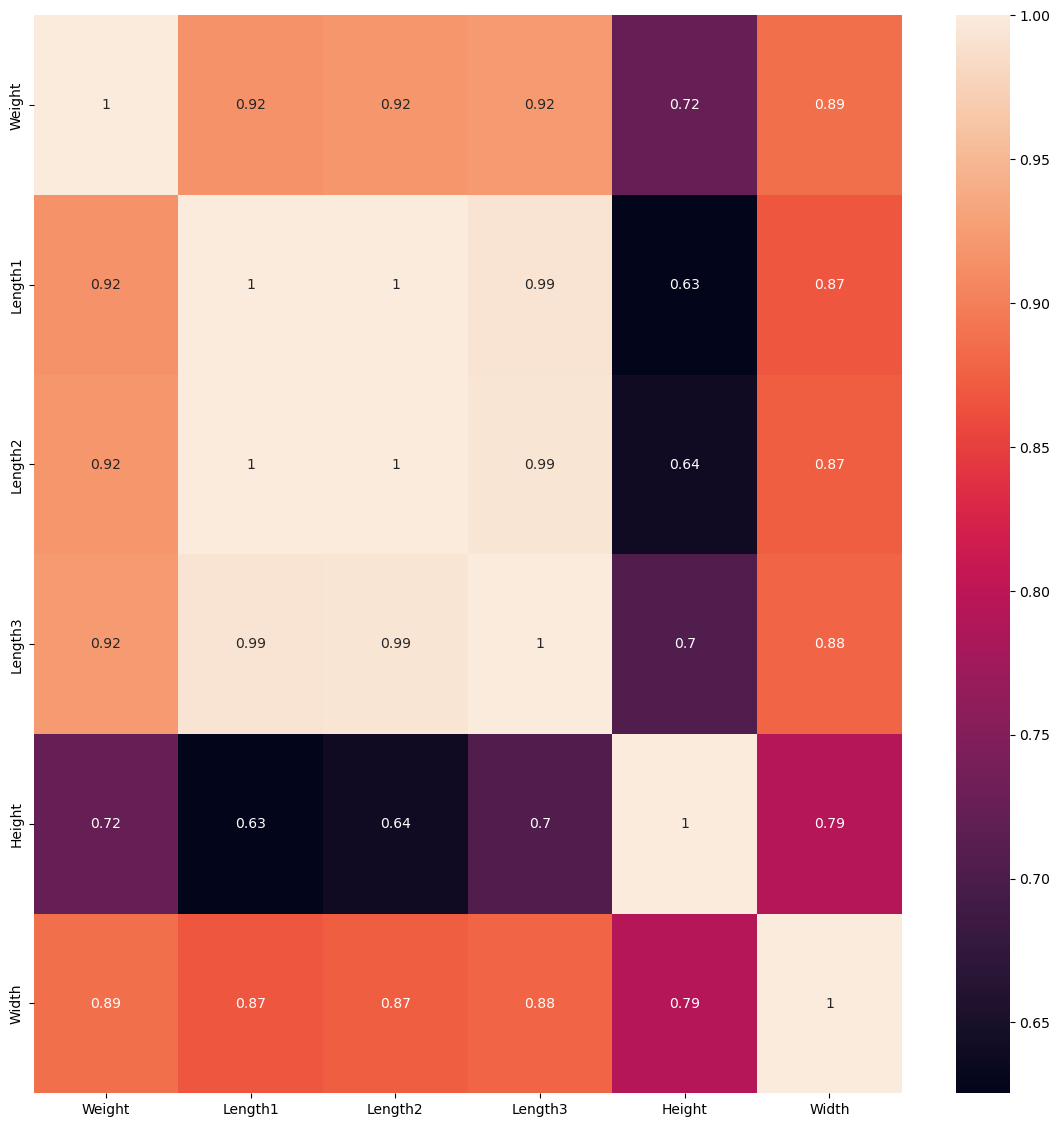

In [7]:
import seaborn as sns
plt.figure (figsize = (14,14))
sns.heatmap(df.corr(), annot = True)

In [8]:
value_count = df['Species'].value_counts()
value_count

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<BarContainer object of 7 artists>

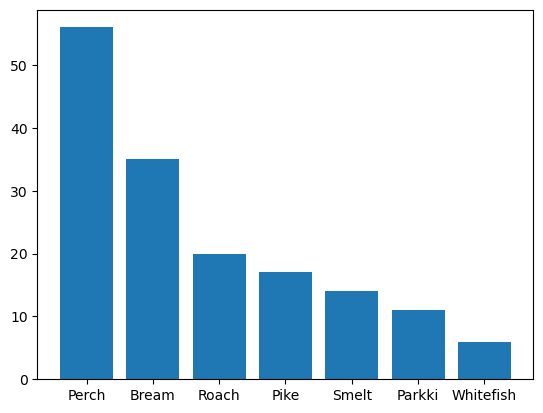

In [9]:
plt.bar(value_count.index, value_count.values)

In [10]:
for col in df.columns[::]:
    if df[col].dtype == object:
        continue
    else:
        Q1=df[col].quantile(q=0.25)
        Q3=df[col].quantile(q=0.75)
        IQR=Q3-Q1

        maximum=Q3+(IQR*1.5)
        minimun=Q1-(IQR*1.5)
        print(col,'Upper Outlier=',df[df[col]>maximum][col].count())
        print(col,'Lower Outlier',df[df[col]<minimun][col].count())

Weight Upper Outlier= 3
Weight Lower Outlier 0
Length1 Upper Outlier= 3
Length1 Lower Outlier 0
Length2 Upper Outlier= 3
Length2 Lower Outlier 0
Length3 Upper Outlier= 1
Length3 Lower Outlier 0
Height Upper Outlier= 0
Height Lower Outlier 0
Width Upper Outlier= 0
Width Lower Outlier 0


In [11]:
for col in df.columns[::]:
    if df[col].dtype == object:
        continue
    else:
        Q1=df[col].quantile(q=0.25)
        Q3=df[col].quantile(q=0.75)
        IQR=Q3-Q1

        maximum=Q3+(IQR*1.5)
        minimun=Q1-(IQR*1.5)
        df.loc[(df[col]>maximum)|(df[col]<minimun)]=df[col].median()

In [12]:
for col in df.columns[::]:
    if df[col].dtype == object:
        continue
    else:
        Q1=df[col].quantile(q=0.25)
        Q3=df[col].quantile(q=0.75)
        IQR=Q3-Q1

        maximum=Q3+(IQR*1.5)
        minimun=Q1-(IQR*1.5)
        print(col,'Upper Outlier=',df[df[col]>maximum][col].count())
        print(col,'Lower Outlier',df[df[col]<minimun][col].count())

Weight Upper Outlier= 0
Weight Lower Outlier 0
Length1 Upper Outlier= 1
Length1 Lower Outlier 0
Length2 Upper Outlier= 0
Length2 Lower Outlier 0
Length3 Upper Outlier= 0
Length3 Lower Outlier 0
Height Upper Outlier= 0
Height Lower Outlier 0
Width Upper Outlier= 0
Width Lower Outlier 0


In [13]:
x=df['Species']

In [14]:
df1=pd.get_dummies(x)

In [15]:
df=pd.concat([df,df1],axis=1)
df

,Species,Weight,Length1,Length2,Length3,Height,Width,7.786,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,0,1,0
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,0,1,0
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,0,1,0
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,0,1,0


In [16]:
df.drop('Species', inplace = True, axis = 1)

<Axes: >

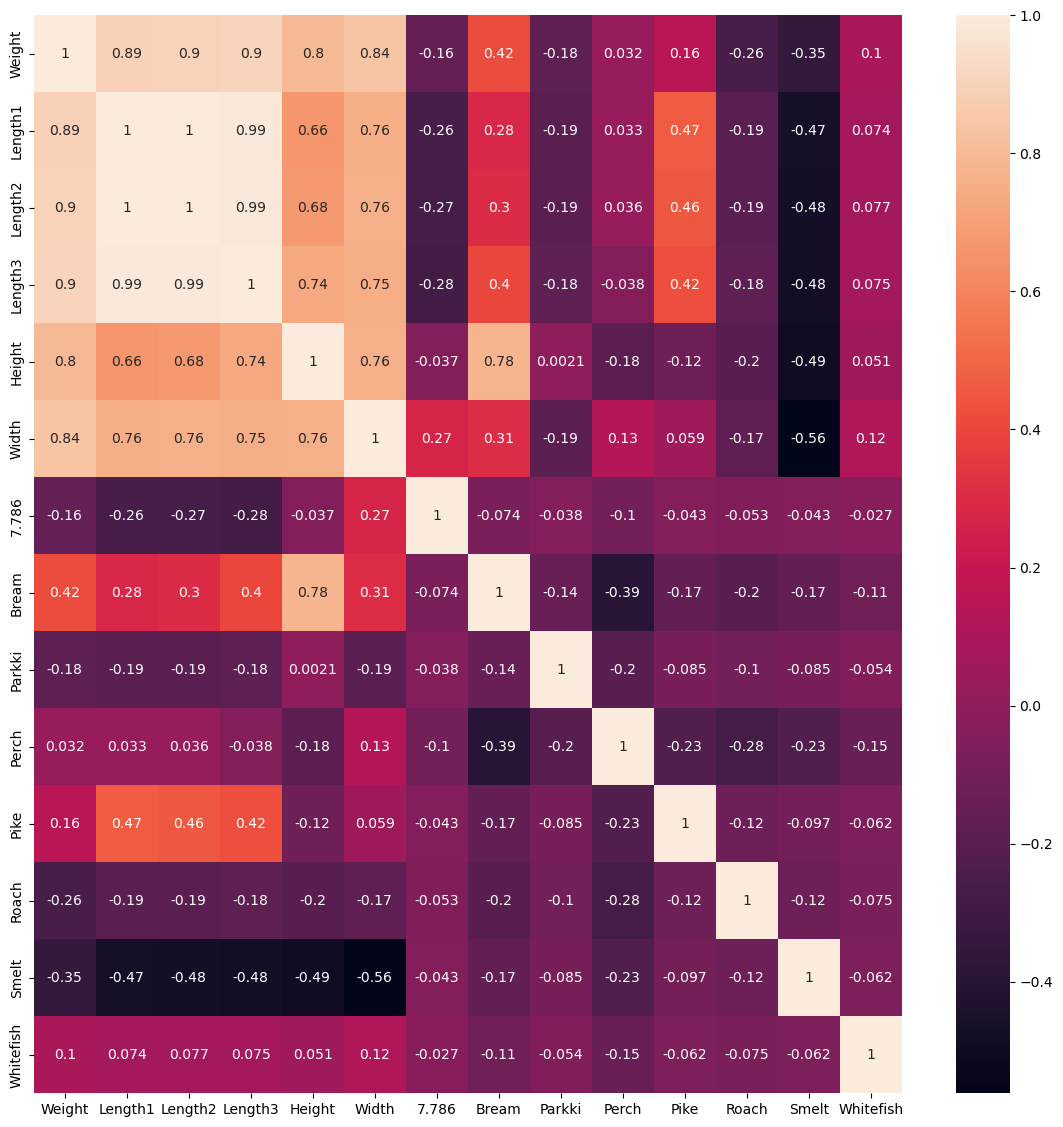

In [17]:
plt.figure (figsize = (14,14))
sns.heatmap(df.corr(), annot = True)

In [18]:
x=df[['Width','Height','Length3','Length2', 'Length3']]
X = df.drop('Weight',axis=1)

In [19]:
y=df['Weight']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test =  train_test_split(x, y,test_size = 0.2, random_state = 40)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(x, y)

LinearRegression()

In [25]:
y_test_pred_2 = model.predict(X_test)

In [26]:
y_train_pred_2 = model.predict(X_train)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
LMr2=r2_score(Y_train, y_train_pred_2)
LMr2

0.8957688424614801

In [29]:
LMr2=r2_score(Y_test, y_test_pred_2)
LMr2

0.8914409617408923

In [30]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, Y_train)

Lasso()

In [31]:
y_pre_lasso_train = lasso_reg.predict(X_train)
y_pre_lasso_test = lasso_reg.predict(X_test)

In [32]:
print(lasso_reg.score(X_test,Y_test))
print(lasso_reg.score(X_train,Y_train))

0.8848028783433459
0.8966786581413962


In [33]:
lasso_reg.score(X_test,y_pre_lasso_test)

1.0

In [34]:
x=df['Width'].values.reshape(-1,1)

In [35]:
y=df['Weight']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, Y_train, Y_test =  train_test_split(x, y,test_size = 0.2, random_state = 40)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()

In [40]:
model.fit(x, y)

LinearRegression()

In [41]:
y_test_pred_2 = model.predict(X_test)

In [42]:
y_train_pred_2 = model.predict(X_train)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
LMr2=r2_score(Y_train, y_train_pred_2)
LMr2

0.7235148058949736

In [45]:
LMr2=r2_score(Y_test, y_test_pred_2)
LMr2

0.6184138025381416

In [46]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, Y_train)

Lasso()

In [47]:
y_pre_lasso_train = lasso_reg.predict(X_train)
y_pre_lasso_test = lasso_reg.predict(X_test)

In [48]:
print(lasso_reg.score(X_test,Y_test))
print(lasso_reg.score(X_train,Y_train))

0.6124243413339951
0.7243812123284268


In [49]:
lasso_reg.score(X_test,y_pre_lasso_test)

1.0